In [7]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import kurtosis    # to calculate kurtosis
from scipy.stats import chi2_contingency   # to calculate the chi square test 
from scipy.stats import zscore, norm   # to calculate the z-test
from pgmpy.models import BayesianModel                 # for the bayes network
from pgmpy.estimators import ParameterEstimator        # for the bayes network
from pgmpy.inference import VariableElimination        # for the bayes network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matri
from sklearn.preprocessing import label_binarize


In [8]:
mydata = pd.read_csv('CarBuyers.csv')

In [9]:
mydata.head(10)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984
5,Volkswagen,Polo,18.192500,5.074074,60.962963,1408.055556,petrol,216333,299110,"31,701",547144
6,Peugeot,206,20.033750,4.833333,71.333333,1631.500000,petrol,178698,250614,"26,135",455447
7,Ford,Mondeo,39.973750,1.750000,130.250000,1998.500000,petrol,357452,"69,603","16,550",443605
8,Nissan,Micra,20.377609,4.869565,67.956522,1279.695652,petrol,143218,253000,"26,619",422837
9,Honda,Civic,29.942625,4.500000,106.225000,1480.575000,petrol,242188,132958,"21,042",396188


In [4]:
mydata.tail(10)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
6082,Mazda,MX-6,30.926667,4.666667,110.333333,2328.333333,petrol,"1,121",294,80,"1,495"
6083,Daimler,Double,106.820000,4.000000,234.000000,5993.000000,petrol,"1,152",129,67,"1,348"
6084,Lotus,Esprit,93.424333,5.000000,233.000000,2995.000000,petrol,"1,215",88,27,"1,330"
6085,Porsche,Carrera,646.605000,6.000000,450.000000,5733.000000,petrol,"1,130",158,42,"1,330"
6086,Nissan,Maxima,34.103571,4.571429,121.857143,2555.285714,petrol,"1,090",160,65,"1,315"
6087,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,diesel,"1,012",150,80,"1,242"
6088,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,petrol,670,482,66,"1,218"
6089,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,petrol,790,247,81,"1,118"
6090,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,petrol,639,416,49,"1,104"
6091,Mitsubishi,Space,23.165158,3.947368,82.157895,1817.315789,petrol,721,251,40,"1,012"


In [5]:
mydata.sample(15)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
2558,Suzuki,SX4,20.669500,4.750000,88.000000,1586.000000,petrol,"3,361","2,159",365,"5,885"
5407,Peugeot,605,35.259727,4.727273,104.636364,2367.181818,petrol,"5,215",804,230,"6,249"
516,Chrysler,Voyager,39.707737,4.842105,117.578947,2719.842105,diesel,"20,696","10,212","1,793","32,701"
448,Citroen,Saxo,12.329818,4.818182,53.818182,1367.272727,petrol,"47,502","44,016","4,307","95,825"
5549,Volkswagen,Scirocco,33.706154,6.153846,120.153846,1750.615385,petrol,"23,258","8,981",998,"33,237"
5235,Porsche,Boxster,83.501250,6.500000,213.500000,3071.000000,petrol,"1,761",358,102,"2,221"
4482,Kia,Carens,31.195000,6.000000,105.875000,1755.750000,petrol,"1,161",419,44,"1,624"
5445,Mercedes,Sprinter,43.068421,6.254386,104.201754,2222.710526,diesel,"2,414",257,172,"2,843"
3917,Daihatsu,Move,12.924000,4.000000,43.000000,989.000000,petrol,748,895,92,"1,735"
3688,Toyota,Avensis,37.315231,4.323077,103.676923,1873.261538,petrol,"71,642","17,198","4,764","93,604"


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB


In [7]:
mydata.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male             object
Female           object
Unknown          object
Total            object
dtype: object

In [8]:
mydata.shape

(6092, 11)

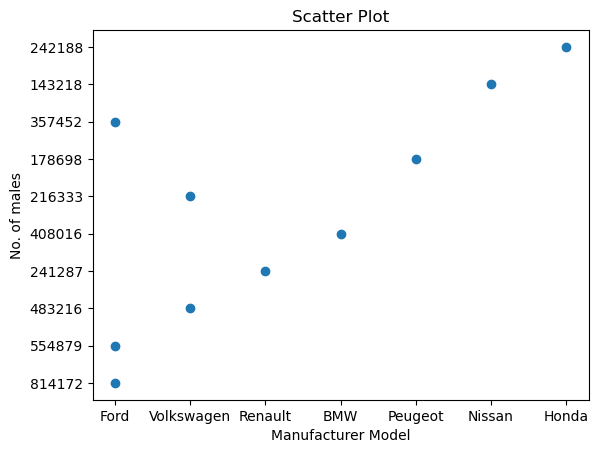

In [9]:
#Scatter Plot (males)

mydata10 = mydata.iloc[:10]  # first ten rows only 
x = mydata10['Manufacturer']
y = mydata10['Male']
plt.scatter(x, y)
plt.xlabel('Manufacturer Model')
plt.ylabel('No. of males') #no. of males who bought this specific model 
plt.title('Scatter Plot')
plt.show()

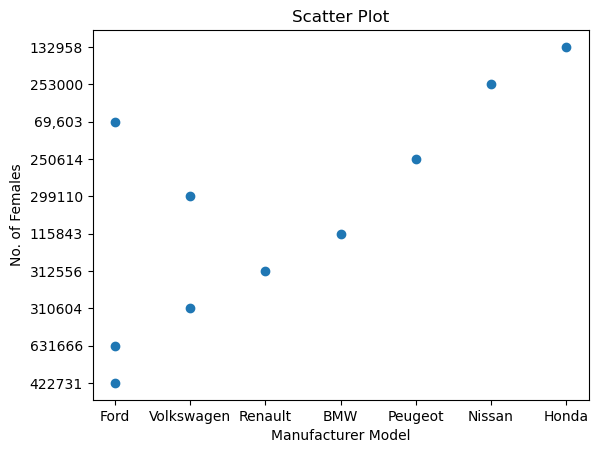

In [10]:
#Scatter Plot (females)

mydata10 = mydata.iloc[:10]   # first ten rows only
x = mydata10['Manufacturer']
y = mydata10['Female']
plt.scatter(x, y)
plt.xlabel('Manufacturer Model')
plt.ylabel('No. of Females') #no. of Females who bought this specific model 
plt.title('Scatter Plot')
plt.show()

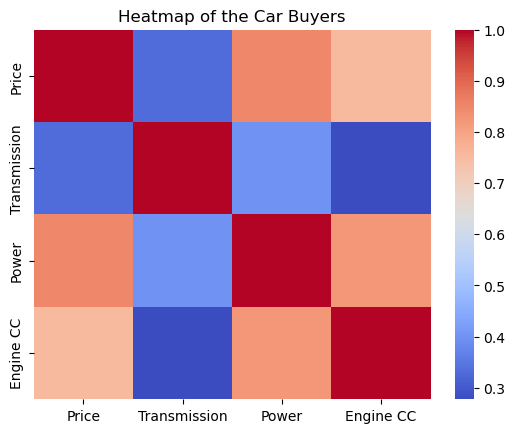

In [3]:
#Heat Map

matrix = mydata.corr()
sns.heatmap(matrix , cmap='coolwarm')
plt.title('Heatmap of the Car Buyers')
plt.show()

In [12]:
mydata.columns

Index(['Manufacturer', 'Model', 'Price', 'Transmission', 'Power', 'Engine CC',
       'Fuel', 'Male', 'Female', 'Unknown', 'Total'],
      dtype='object')

In [13]:
#Checking for Null Values

mydata.isnull().sum()

Manufacturer    0
Model           0
Price           0
Transmission    0
Power           0
Engine CC       0
Fuel            0
Male            0
Female          0
Unknown         0
Total           0
dtype: int64

In [14]:
#Checking for not a number values - axis = 0

mydata.isna().any(axis=0)

Manufacturer    False
Model           False
Price           False
Transmission    False
Power           False
Engine CC       False
Fuel            False
Male            False
Female          False
Unknown         False
Total           False
dtype: bool

In [15]:
#Checking for not a number values - axis = 1

mydata.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6087    False
6088    False
6089    False
6090    False
6091    False
Length: 6092, dtype: bool

In [16]:
#Checking for duplicated values

mydata[mydata.duplicated()]

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total


In [17]:
#Checking for duplicated values in model column

mydata.duplicated('Model')

0       False
1       False
2       False
3       False
4       False
        ...  
6087     True
6088     True
6089     True
6090     True
6091     True
Length: 6092, dtype: bool

In [18]:
#Number of duplicated rows in model column 

mydata.duplicated('Model').sum()

5591

In [19]:
#Dropping the rows that contain duplicated values

mydata.drop_duplicates(subset=['Model'], inplace=True)

In [20]:
mydata.duplicated('Model').sum()   #check to see if there is any duplicted values left

0

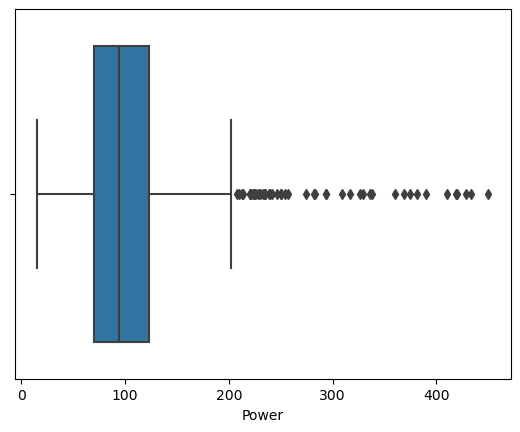

In [21]:
#Boxplot (Horse power)

sns.boxplot(x=mydata["Power"])
plt.show() # it should be normal that horsepower is high 

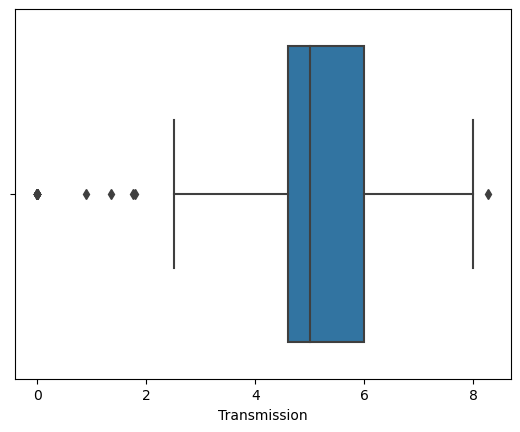

In [22]:
#Boxplot (Transmission)

sns.boxplot(x=mydata["Transmission"])
plt.show()

In [23]:
#filtering the rows that contain transmission more than 8 and less than 3 because they don't exist

mydata = mydata[(mydata['Transmission'] >= 3) & (mydata['Transmission'] <= 8 ) ]

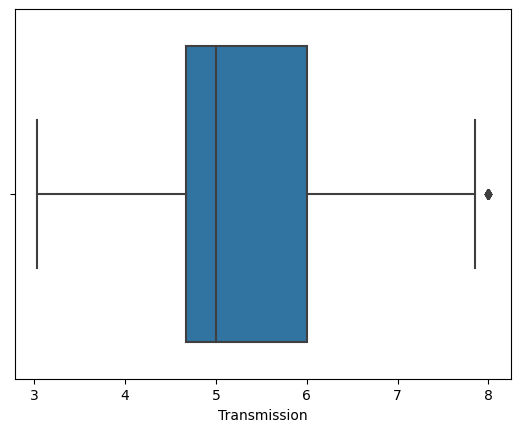

In [24]:
sns.boxplot(x=mydata["Transmission"])
#plt.show()

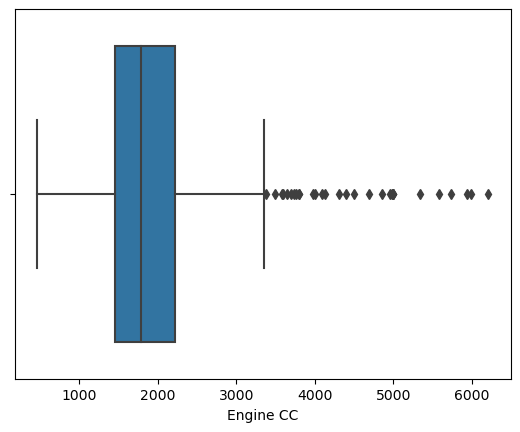

In [25]:
#Boxplot (Engine CC)

sns.boxplot(x=mydata['Engine CC'])
plt.show()

In [26]:
#Filtering the Engine CC that's more than 5000 and less than 900

mydata = mydata[(mydata['Engine CC'] >= 900) & (mydata['Engine CC'] <= 5000 ) ] # supercars can have over 3000CC

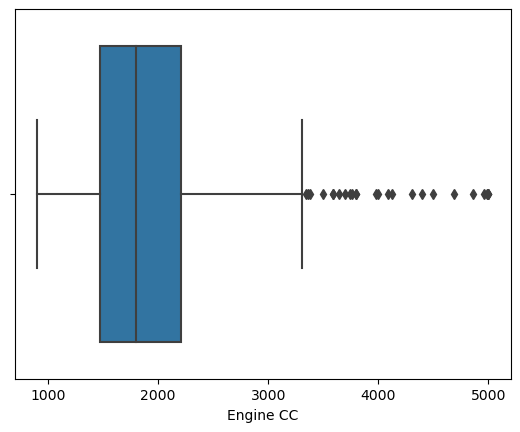

In [27]:
sns.boxplot(x=mydata['Engine CC'])
plt.show()

In [28]:
#Checking for zero values after filtering 

count = (mydata['Power'] == 0).sum()
print(count)

0


In [29]:
#Checking for zero values after filtering 

count = (mydata['Transmission'] == 0).sum()
print(count)

0


In [30]:
#Checking for zero values after filtering 

count = (mydata['Price'] == 0).sum()
print(count)

0


In [31]:
#Checking for zero values after filtering 


count = (mydata['Male'] == 0).sum()
print(count)

0


In [32]:
#Checking for zero values after filtering 

count = (mydata['Female'] == 0).sum()
print(count)

0


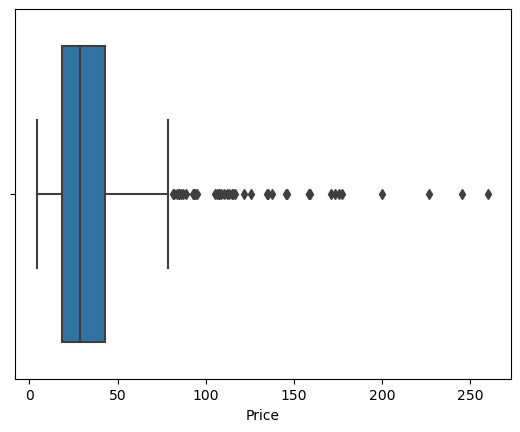

In [33]:
#Boxplot (prices)

sns.boxplot(x=mydata['Price'])
plt.show()

In [34]:
#Normalizing the prices to a specific scale

mydata = mydata[(mydata['Price'] >= 10) & (mydata['Price'] <= 200  ) ] #supercars could be expensive

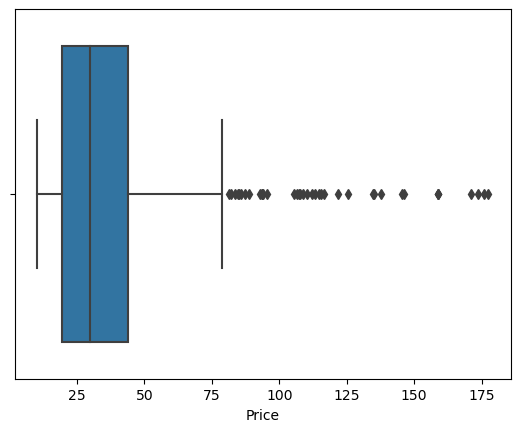

In [35]:
sns.boxplot(x=mydata['Price'])
plt.show()

Text(0, 0.5, 'Number')

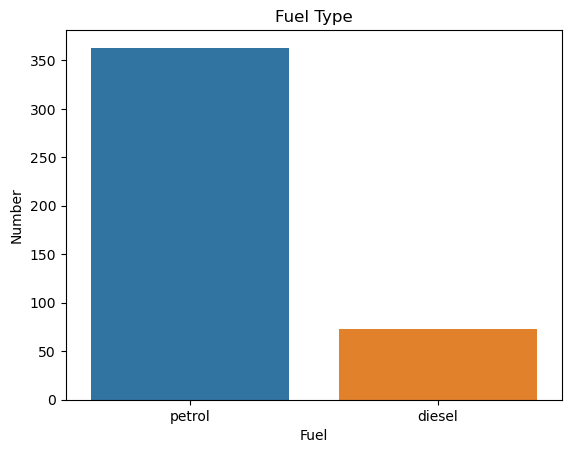

In [36]:
#Histogram for fuel type

sns.countplot(data=mydata , x='Fuel')
plt.title('Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

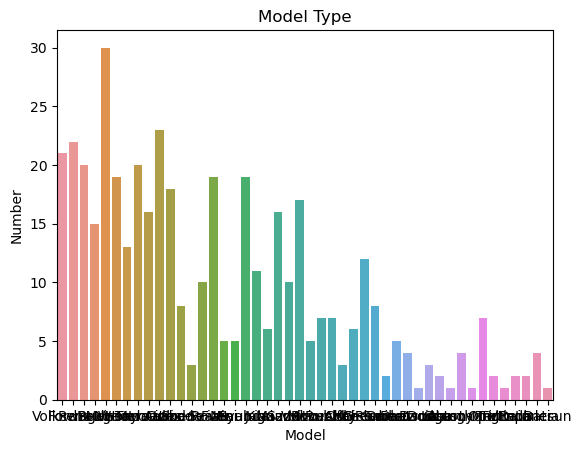

In [38]:
#Histogram for the whole model type 

sns.countplot(data=mydata , x='Manufacturer' )
plt.title('Model Type')
plt.xlabel('Model')
plt.ylabel('Number')

In [39]:
#finding mean, variance, st dev, covariance, correlation

mydata.mean()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_83188/3954023024.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.mean()


Price             38.107452
Transmission       5.377749
Power            110.909333
Engine CC       1970.058394
dtype: float64

In [40]:
mydata.var()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_83188/1215635467.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.var()


Price              894.401302
Transmission         1.043984
Power             3564.211276
Engine CC       495270.421258
dtype: float64

In [41]:
mydata.std()

/var/folders/pb/0_h9v7n92911806r472ls_kc0000gn/T/ipykernel_83188/4159344101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mydata.std()


Price            29.906543
Transmission      1.021755
Power            59.701016
Engine CC       703.754518
dtype: float64

In [42]:
covariance = mydata.cov()
print(covariance)

                     Price  Transmission         Power      Engine CC
Price           894.401302     17.842213   1695.471867   16718.028269
Transmission     17.842213      1.043984     34.905763     162.734590
Power          1695.471867     34.905763   3564.211276   34521.541041
Engine CC     16718.028269    162.734590  34521.541041  495270.421258


In [4]:
correlation = mydata.corr()
print(correlation)

                 Price  Transmission     Power  Engine CC
Price         1.000000      0.329598  0.849530   0.752509
Transmission  0.329598      1.000000  0.401518   0.277336
Power         0.849530      0.401518  1.000000   0.822792
Engine CC     0.752509      0.277336  0.822792   1.000000


In [9]:
#calculation the skewness

skewness = mydata[['Price', 'Transmission', 'Power', 'Engine CC']].skew()
print("Skewness: ")
print(skewness)

Skewness: 
Price           6.718310
Transmission   -0.732265
Power           2.280540
Engine CC       1.996236
dtype: float64


In [12]:
#calculating the kurtosis

kurtosis_specific = mydata[['Price', 'Transmission', 'Power', 'Engine CC']].kurtosis()
print("Kurtosis: ")
print(kurtosis)

Kurtosis: 
Price           66.284794
Transmission     3.659913
Power            6.459182
Engine CC        6.480850
dtype: float64


In [15]:
#calculating the covariance matrix

cov = mydata.cov()
print("Covariance Matrix:")
print(cov)

Covariance Matrix:
                     Price  Transmission         Power      Engine CC
Price          2637.635580     22.748134   2950.348893   31590.699990
Transmission     22.748134      1.805953     36.487621     304.649127
Power          2950.348893     36.487621   4572.714528   45479.669160
Engine CC     31590.699990    304.649127  45479.669160  668159.636553


In [20]:
#Chi square test

Model = mydata['Model']
Male = mydata['Male']

contingency_table = pd.crosstab(Model, Male)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 2604467.4870889555
P-value: 1.0
Degrees of Freedom: 2691500
Expected Frequencies Table:
[[0.00525279 0.00525279 0.0026264  ... 0.0026264  0.00525279 0.0026264 ]
 [0.00656599 0.00656599 0.00328299 ... 0.00328299 0.00656599 0.00328299]
 [0.0026264  0.0026264  0.0013132  ... 0.0013132  0.0026264  0.0013132 ]
 ...
 [0.00393959 0.00393959 0.0019698  ... 0.0019698  0.00393959 0.0019698 ]
 [0.00656599 0.00656599 0.00328299 ... 0.00328299 0.00656599 0.00328299]
 [0.00361129 0.00361129 0.00180565 ... 0.00180565 0.00361129 0.00180565]]


In [29]:
# ANOVA test

group1 = mydata['Price'].iloc[:30]   # i take only 30 rows so the output is more readable
group2 = mydata['Power'].iloc[:30]   # i take only 30 rows so the output is more readable

f_statistic, p_value = stats.f_oneway(group1, group2)

print("F Statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05    # modify the alpha value here 

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

F Statistic: 74.65068179067563
P-value: 5.2308273115121096e-12
Reject the null hypothesis


In [42]:
# Z-test 
# Z-test isnt the best test on this data set

group1 = mydata['Price'].iloc[:15]
group2 = mydata['Power'].iloc[:15]

z_scores_group1 = zscore(group1)
z_scores_group2 = zscore(group2)

std_dev_group1 = group1.std()
std_dev_group2 = group2.std()
std_error = ((std_dev_group1**2) / len(group1) + (std_dev_group2**2) / len(group2))**0.5

mean_difference = group1.mean() - group2.mean()
z_statistic = mean_difference / std_error

p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)


Z-statistic: -7.709194201642649
P-value: 1.2656542480726785e-14


In [43]:
#Naive Bayes Classifier ___________________________________________________________________________________________

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the 'Fuel' column
mydata['Fuel'] = le.fit_transform(mydata['Fuel'])

Accuracy: 0.8293683347005743


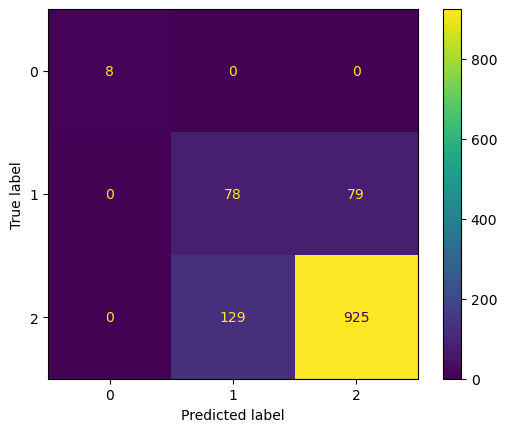

Precision score:  0.7660421117462516
Recall score:  0.7914747982611988
F1 score:  0.7758341431810819


In [45]:
# define the features and target variables
X = mydata[[ 'Price' , 'Engine CC' , 'Price' , 'Power' , 'Transmission']] #can't include male and female because it contain a comma
y = mydata['Fuel']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# train the model
model = GaussianNB()
model.fit(X_train, y_train)

# test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print('Precision score: ', format(precision_score(y_test, y_pred , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, y_pred , average='macro')))
print('F1 score: ', format(f1_score(y_test, y_pred , average='macro')))


In [ ]:
# Bayesian Belief Network

model_structure = [
    ('Price', 'Fuel'),
    ('Power', 'Fuel'),
    ('Engine CC', 'Fuel')
]

bayesian_model = BayesianModel(model_structure)

bayesian_model.fit(mydata)

inference = VariableElimination(bayesian_model)

query_result = inference.query(variables=['Fuel'], evidence={'Price': 100, 'Power': 300, 'Engine CC':3000})
print(query_result)

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


Accuracy score:  0.8594091903719913


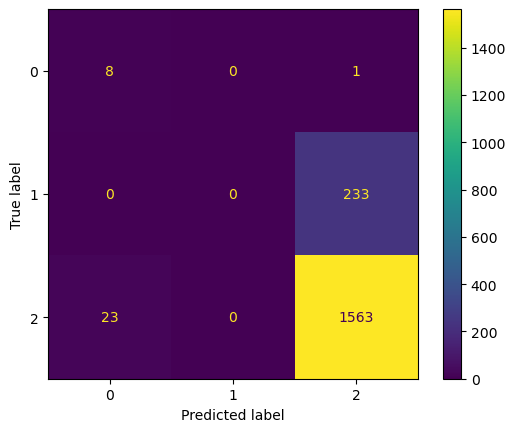

Precision score:  0.37594916258279926
Recall score:  0.6247956657792724
F1 score:  0.44134397477584003


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
#LDA Classifier ___________________________________________________________________________________________________

LDA = LinearDiscriminantAnalysis()
X = LDA.fit(X_train,y_train) # X = price , Engine CC , Transmission and Power
prediction=X.predict(X_test) # Y = fuel (Target)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, prediction)))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()
print('Precision score: ', format(precision_score(y_test, prediction , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, prediction, average='macro')))
print('F1 score: ', format(f1_score(y_test, prediction, average='macro')))

In [ ]:
# PCA

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict

X = mydata[[ 'Price' , 'Engine CC' , 'Price' , 'Power' , 'Transmission']] #can't include male and female because it contain a comma
y = mydata['Fuel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

knn_pca = KNeighborsClassifier(n_neighbors=3)

In [6]:
# SVD as feature reduction (which takes a matrix and reduce the dimension of it by using the most important features)

def svd_decomposition(matrix):
    U, S, VT = np.linalg.svd(matrix, full_matrices=False)   # economy-sized decomposition (small)
    return U, S, VT

matrix = mydata[[ 'Price' , 'Engine CC' , 'Price' , 'Power' , 'Transmission']]  # work only with numerical data
U, S, VT = svd_decomposition(matrix)

print("U matrix:")
print(U)             # Left singular vectors matrix.
print("\nS matrix (diagonal singular values):")
print(np.diag(S))    # The diagonal singular values are returned as a 1D array S and we use np.diag(s) to obtain it
print("\nVT matrix:")
print(VT)            # Transpose of the right singular vectors matrix.


U matrix:
[[-8.94747587e-03  8.39121117e-04  5.08942319e-03  1.52359121e-02
   9.98729655e-01]
 [-6.96601611e-03  2.46969964e-03  3.87726501e-03  1.86695728e-02
  -3.42204490e-04]
 [-9.18543597e-03  1.64802919e-03  2.41561528e-03  1.67175438e-02
  -1.01603149e-03]
 ...
 [-1.61129174e-02  2.09871938e-03  6.71678950e-03 -3.87559208e-03
   5.83325465e-04]
 [-1.34548325e-02  8.53583961e-03  2.10383238e-04 -9.80169160e-03
  -1.53771780e-05]
 [-1.08455649e-02  7.83267712e-03 -2.10273730e-03 -2.44293592e-03
  -3.09708640e-05]]

S matrix (diagonal singular values):
[[1.67724414e+05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 4.86851605e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.12368716e+03 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.48116804e+02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.77694711e-12]]

VT matrix:
[[-2.46219862e-02 -9.97

Accuracy score:  0.8834792122538293


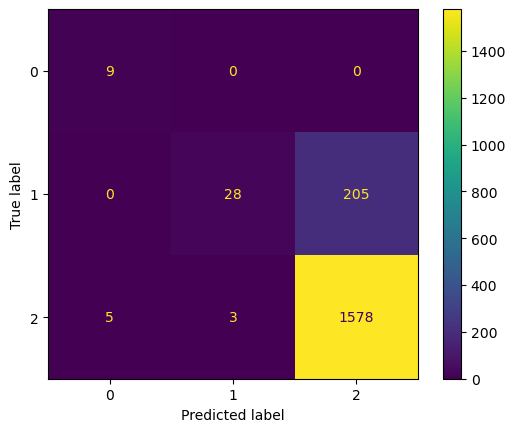

Precision score:  0.8103693958903554
Recall score:  0.7050425125426885
F1 score:  0.6438354664379675


In [148]:
#Decision Tree Classifier (Entropy)________________________________________________________________________________

Tree = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
Tree.fit(X_train,y_train) # X = price , Engine CC , Transmission and Power
prediction = Tree.predict(X_test) # Y = fuel (Target) 
Accuracy = print('Accuracy score: ', format(accuracy_score(y_test, prediction)))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()
print('Precision score: ', format(precision_score(y_test, prediction , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, prediction, average='macro')))
print('F1 score: ', format(f1_score(y_test, prediction, average='macro')))

In [167]:
#Linear Regression ________________________________________________________________________________________________


mydata = pd.read_csv('CarBuyers.csv')
le = LabelEncoder()
mydata['Fuel'] = le.fit_transform(mydata['Fuel'])

X = mydata[['Price', 'Transmission', 'Power', 'Engine CC']]
y = mydata['Fuel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
prediction = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print(score)




0.028868724787521116


Accuracy score:  0.8796498905908097


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


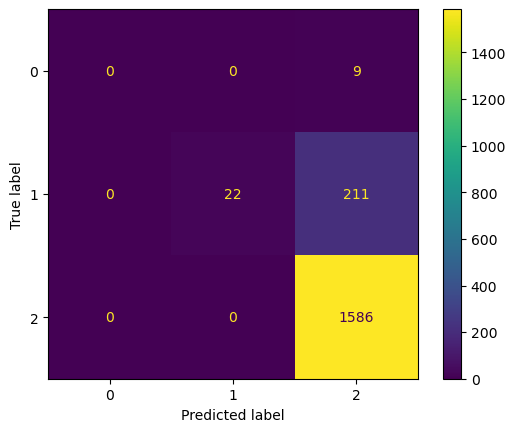

Precision score:  0.626061277224068
Recall score:  0.3648068669527897
F1 score:  0.36923017634726846


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
#Logistic Regression ______________________________________________________________________________________________

model = LogisticRegression()
X = model.fit(X_train,y_train) # target = Fuel = Y , X = Engine CC, Power, Transmission, Price
prediction = X.predict(X_test)
Accuracy = print('Accuracy score: ', format(accuracy_score(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()
print('Precision score: ', format(precision_score(y_test, prediction , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, prediction, average='macro')))
print('F1 score: ', format(f1_score(y_test, prediction, average='macro')))

Accuracy score:  0.9890590809628009


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


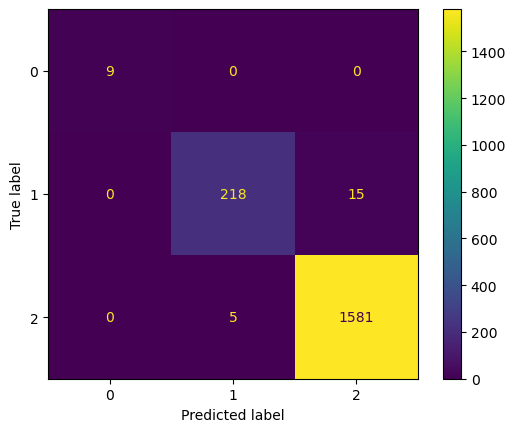

Precision score:  0.9893933263652405
Recall score:  0.9774899108255894
F1 score:  0.9832849985848763


In [169]:
#KNN Classifier __________________________________________________________________________________________________

KNN = KNeighborsClassifier(n_neighbors=5)  # you can modify the distance from here as required in this phase
Model_KNN = KNN.fit(X_train,y_train) # target = Fuel = Y , X = Engine CC, Power, Transmission, Price
prediction = Model_KNN.predict(X_test)
Accuracy = print('Accuracy score: ', format(accuracy_score(y_test, prediction)))

ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()
print('Precision score: ', format(precision_score(y_test, prediction , average='macro'))) # average = binary doesn't work
print('Recall score: ', format(recall_score(y_test, prediction, average='macro')))
print('F1 score: ', format(f1_score(y_test, prediction, average='macro')))

In [120]:
#Neural Network as a classifier

NN = MLPRegressor()
NN.fit(X_train, y_train)          # target = Fuel = Y , X = Engine CC, Power, Transmission, Price
prediction = NN.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.29568982503377433
Mean Squared Error: 0.16332713661561044
Root Mean Squared Error: 0.4041375219100677


<AxesSubplot:>

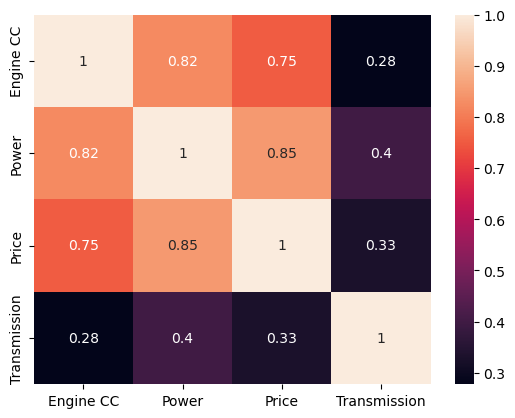

In [122]:
#Correlation between variables (i chose the same attributes with each algorithm) __________________________________

newdata = mydata[['Engine CC' ,'Power','Price', 'Transmission' ]]
sns.heatmap(newdata.corr(), annot = True)

In [11]:
# Neural Network Classifier

X = mydata[['Price', 'Transmission', 'Power', 'Engine CC']]
y = mydata['Fuel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

NN = MLPClassifier()
NN.fit(X_train, y_train)      # target = Fuel = Y , X = Engine CC, Power, Transmission, Price
predictions = NN.predict(X_test)


print("Classification Report:")                   # Report
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)    # Accuracy
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

   automatic       1.00      0.88      0.93         8
      diesel       0.00      0.00      0.00       152
      petrol       0.87      1.00      0.93      1059

    accuracy                           0.87      1219
   macro avg       0.62      0.62      0.62      1219
weighted avg       0.77      0.87      0.82      1219

Accuracy: 0.874487284659557


/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/omarmedhat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


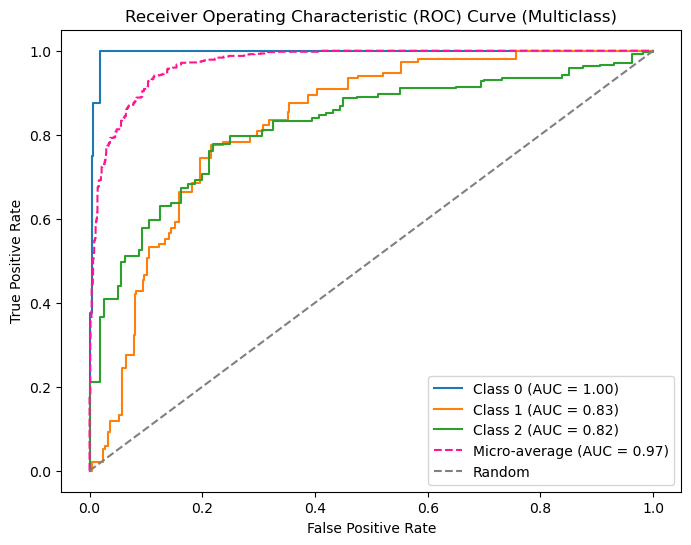

Confusion Matrix:
[[   3    0    5]
 [   0    3  149]
 [   5    7 1047]]


In [16]:
# ROC Diagram

X = mydata[['Price', 'Transmission']]
y = mydata['Fuel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

NN = MLPClassifier()
NN.fit(X_train, y_train)
predictions = NN.predict(X_test)


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], NN.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), NN.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', color='deeppink')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Multiclass)')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
summary of the data:

#The dataset contains 6092 rows and 11 columns.
#The target variable is not specified.
#The features include:
#Manufacturer: Categorical variable indicating the car manufacturer.
#Model: Categorical variable indicating the car model.
#Price: Numerical variable indicating the car price.
#Transmission: Numerical variable indicating the car transmission type.
#Power: Numerical variable indicating the car power.
#Engine CC: Numerical variable indicating the car engine capacity.
#Fuel: Categorical variable indicating the car fuel type.
#Male: Categorical variable indicating the number of male buyers.
#Female: Categorical variable indicating the number of female buyers.
#Unknown: Categorical variable indicating the number of unknown gender buyers.
#Total: Categorical variable indicating the total number of buyers.
#The dataset contains both categorical and numerical variables.
#There are no missing values in the dataset.
#This data has been fetched from https://www.car-data.com/ 
# Mainak Chaudhuri is the owner of the data 
# this dataset was generated in India

In [127]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
 11  Fuel_binary   6092 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 571.2+ KB
